In [1]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

In [2]:
# Create an object called iris with the iris data
#iris = load_iris()

# Create a dataframe with the four feature variables
df10 = pd.read_csv("Source_2010_woPASC_csv.csv", sep=',', header=0, parse_dates=[0])
df12 = pd.read_csv("Source_2012_woCHER_csv.csv", sep=',', header=0, parse_dates=[0])
df14 = pd.read_csv("Source_2014_woCHER_csv.csv", sep=',', header=0, parse_dates=[0])

df1012 = pd.read_csv("2010-2012_combined.csv",sep=',', header=0, parse_dates=[0])
# View the top 5 rows
#df12




In [3]:
#THIS CREATES A NEW GROUPING

groups = []

rate1012 = df1012.iloc[:,4]
#df.loc[row_indexer,column_indexer]

for ar in rate1012:
    if ar >= 0 and ar < 5.848:
        groups.append(1)
    if ar >=5.848 and ar <11.697:
        groups.append(2)
    if ar >= 11.697 and ar <17.545:
        groups.append(3)
    if ar >= 17.545 and ar < 23.393:
        groups.append(4)
    if ar >= 23.393 and ar < 29.242:
        groups.append(5)
    if ar >= 29.242 and ar <= 35.090: 
        groups.append(6)
df1012["groups"] = groups


groups = [] 
rate14 = df14.iloc[:,4]
for ar in rate14:
    if ar >= 0 and ar < 5.848:
        groups.append(1)
    if ar >=5.848 and ar <11.697:
        groups.append(2)
    if ar >= 11.697 and ar <17.545:
        groups.append(3)
    if ar >= 17.545 and ar < 23.393:
        groups.append(4)
    if ar >= 23.393 and ar < 29.242:
        groups.append(5)
    if ar >= 29.242 and ar <= 35.090: 
        groups.append(6)
df14["groups"] = groups



In [4]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
#df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
#df.head()

In [5]:
# Create two new dataframes, one with the training rows, one with the test rows
# train, test = df[df['is_train']==True], df[df['is_train']==False]
train, test = df1012, df14

In [6]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 228
Number of observations in the test data: 114


In [7]:
# Create a list of the feature column's names

#features = df.columns[8:10]
features = ['Needy Perc','S:T Ratio','Acts per 1000 students','Black Perc']
#'Urban centric local number', 'Dropout Rate'
#''Urban centric local number'] 'S:T Ratio',



# View features
print(features)


['Needy Perc', 'S:T Ratio', 'Acts per 1000 students', 'Black Perc']


In [8]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
#pd.factorize(train['Urban-centric Locale Num']
        

nums = pd.factorize(train['groups'])
y = nums[0]
# View target
#y = pd.train['Urban-centric Locale Num']

train['groups']
 
k = train['groups']


In [9]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], k)

/home/vcm/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([2, 2, 2, 4, 2, 3, 1, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 4, 2, 3, 3, 3, 2, 2, 2, 3, 4, 2, 3, 2, 4, 2, 4, 2, 2, 4,
       2, 6, 3, 4, 3, 2, 3, 2, 4, 2, 4, 2, 4, 3, 2, 4, 3, 2, 2, 3, 2, 3,
       2, 2, 3, 3, 3, 2, 4, 1, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 4,
       2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 4, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 2, 2])

In [11]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0.2, 0.4, 0.4, 0. , 0. , 0. ],
       [0. , 0.8, 0.1, 0.1, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0.1, 0. , 0.4, 0.5, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0.3, 0.1, 0. ],
       [0.6, 0.1, 0.3, 0. , 0. , 0. ],
       [0. , 0.2, 0.7, 0.1, 0. , 0. ],
       [0. , 0.3, 0.6, 0.1, 0. , 0. ],
       [0. , 0.2, 0.7, 0. , 0.1, 0. ]])

In [12]:
# Create actual english names for the plants for each predicted plant class
preds = clf.predict(test[features])

# View the PREDICTED species for the first five observations
#preds

In [13]:
# View the ACTUAL species for the first five observations
#test['groups']


In [23]:
# Create confusion matrix
real = test['groups'] 
pd.crosstab(real, preds, rownames=['Actual'], colnames=['Predicted'])

test['groups']

0      3
1      2
2      2
3      3
4      2
5      3
6      3
7      2
8      3
9      6
10     4
11     3
12     3
13     2
14     3
15     2
16     2
17     3
18     3
19     3
20     4
21     3
22     3
23     2
24     3
25     3
26     3
27     4
28     4
29     3
      ..
84     2
85     3
86     4
87     3
88     3
89     2
90     3
91     2
92     2
93     4
94     3
95     3
96     2
97     2
98     4
99     3
100    2
101    3
102    4
103    3
104    6
105    6
106    3
107    2
108    4
109    2
110    2
111    3
112    2
113    2
Name: groups, Length: 114, dtype: int64

In [15]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('Needy Perc', 0.2519774516814568),
 ('S:T Ratio', 0.23756368951801346),
 ('Acts per 1000 students', 0.23137882068846452),
 ('Black Perc', 0.2790800381120652)]

In [16]:
#testing group
count = 0 
real = test['groups']
for index in range (0, len(real)):
    if(real[index]==preds[index]):
        count+=1
acc = count * 100/ len(real)


52
45.6140350877193


In [17]:
counting = 0 
numOne = 0
oneCorr = 0
numTwo = 0
twoCorr = 0
numThree = 0
threeCorr = 0
numFour = 0
fourCorr = 0
numFive = 0
fiveCorr = 0
numSix = 0
sixCorr = 0
numSev = 0
sevCorr = 0

for index in range (0, len(real)):
    if real[index] == 1: 
        numOne+=1
        if preds[index] == 1:
            oneCorr+=1
    if real[index] == 2:
        numTwo+=1
        if preds[index] == 2:
            twoCorr +=1
    if real[index] == 3:
        numThree +=1
        if preds[index] == 3:
            threeCorr +=1
    if real[index] == 4:
        numFour += 1
        if preds[index] == 4:
            fourCorr +=1
    if real[index] == 5:
        numFive +=1
        if preds[index] == 5:
            fiveCorr +=1
    if real[index] == 6:
        numSix +=1
        if preds[index] == 6:
            sixCorr +=1 
    if real[index] == 7:
        numSev+=1
        if preds[index] == 7:
            sevCorr +=1
    


In [18]:
acc1 = oneCorr * 100/numOne
acc2 = twoCorr * 100/numTwo
acc3 = threeCorr * 100/numThree
acc4 = fourCorr *100/numFour
acc5 = fiveCorr * 100/numFive
acc6 = sixCorr * 100/numSix


In [19]:
res = {}
res['Overall'] = acc
res['Group 1'] = acc1
res['Group 2'] = acc2
res['Group 3'] = acc3
res['Group 4'] = acc4
res['Group 5'] = acc5
res['Group 6'] = acc6

res

{'Group 1': 0.0,
 'Group 2': 73.33333333333333,
 'Group 3': 47.05882352941177,
 'Group 4': 25.0,
 'Group 5': 0.0,
 'Group 6': 0.0,
 'Overall': 45.6140350877193}

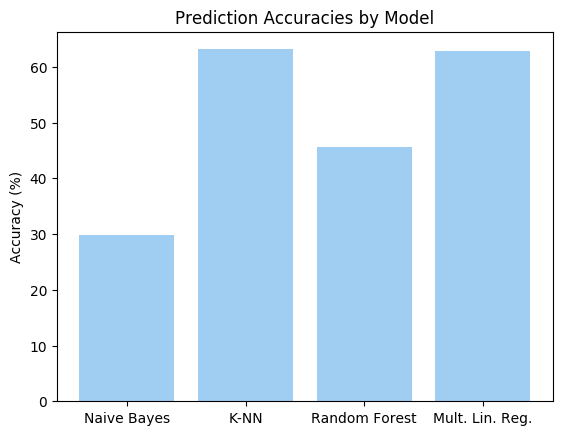

In [29]:
# this creates a bar graph shign the overall accuracy rate by model
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Naive Bayes', 'K-NN', 'Random Forest', 'Mult. Lin. Reg.')
y_pos = np.arange(len(objects))
performance = [29.82,63.15,45.61,62.78,]

plt.bar(y_pos, performance, color= '#439EE9',align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy (%)')
plt.title('Prediction Accuracies by Model')

plt.show()
#51B383
#439EE9

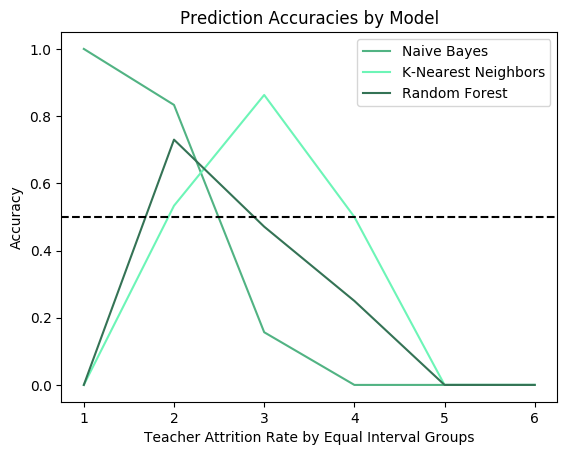

In [28]:
# this creates a line graph showing the accuraccies for each classifier by group

NB = [1, .83333, .1568, 0, 0, 0]
KNN = [0,.53333,.863,.5,.0,.0]
RF = [0, .73,.471,.25,0,0]

plt.plot(range(1, 7),NB, c= '#51B383', label = "Naive Bayes") 
plt.plot(range(1, 7),KNN, c= '#6DF5B7', label = "K-Nearest Neighbors") 
plt.plot(range(1, 7),RF, c= '#347355', label = "Random Forest") 
plt.title("Prediction Accuracies by Model")
plt.xlabel("Teacher Attrition Rate by Equal Interval Groups")
plt.ylabel("Accuracy")
plt.axhline(0.5, color = 'black', linestyle = 'dashed')
plt.legend(loc = 'upper right')
plt.show()